# 3.6 Keypoint Extraction using MediaPipe (ISL_CLSRT Samples)

This notebook demonstrates how to extract hand, pose, and face keypoints from sign language videos using MediaPipe's Holistic model.  
Keypoints are essential for gesture analysis, signer bias detection, and building multimodal generative models.


In [2]:
!pip install mediapipe opencv-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of opencv-contrib-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 8.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing inst

In [9]:
import mediapipe as mp
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
video_dir = '/content/drive/MyDrive/IETGenAI-SLT/Chapter 3/Sample Videos'
video_files = [
    'are you free today (2).mp4',
    'bring water for me (1).MP4',
    'could you please talk slower (1).mp4'
]
video_paths = [os.path.join(video_dir, f) for f in video_files]


## Keypoint Extraction Function

In [11]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

def extract_keypoints(video_path, max_frames=1):
    cap = cv2.VideoCapture(video_path)
    holistic = mp_holistic.Holistic(static_image_mode=True)

    keypoint_data = []

    frame_count = 0
    while cap.isOpened() and frame_count < max_frames:
        ret, frame = cap.read()
        if not ret:
            break

        image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = holistic.process(image_rgb)

        row = []

        if results.pose_landmarks:
            for lm in results.pose_landmarks.landmark:
                row.extend([lm.x, lm.y, lm.z, lm.visibility])
        else:
            row.extend([0]*132)  # 33 points × 4

        if results.left_hand_landmarks:
            for lm in results.left_hand_landmarks.landmark:
                row.extend([lm.x, lm.y, lm.z])
        else:
            row.extend([0]*63)  # 21 points × 3

        if results.right_hand_landmarks:
            for lm in results.right_hand_landmarks.landmark:
                row.extend([lm.x, lm.y, lm.z])
        else:
            row.extend([0]*63)

        if results.face_landmarks:
            for lm in results.face_landmarks.landmark[:10]:  # just a subset to limit size
                row.extend([lm.x, lm.y, lm.z])
        else:
            row.extend([0]*30)

        keypoint_data.append(row)
        frame_count += 1

    cap.release()
    holistic.close()
    return np.array(keypoint_data)


## Extract Keypoints and Save

In [12]:
for path in video_paths:
    name = os.path.basename(path).split('.')[0].replace(' ', '_').lower()
    keypoints = extract_keypoints(path)
    np.save(f'{name}_keypoints.npy', keypoints)
    print(f'Keypoints extracted and saved for: {name}')


Keypoints extracted and saved for: are_you_free_today_(2)
Keypoints extracted and saved for: bring_water_for_me_(1)
Keypoints extracted and saved for: could_you_please_talk_slower_(1)


## Visualize Keypoints Overlaid

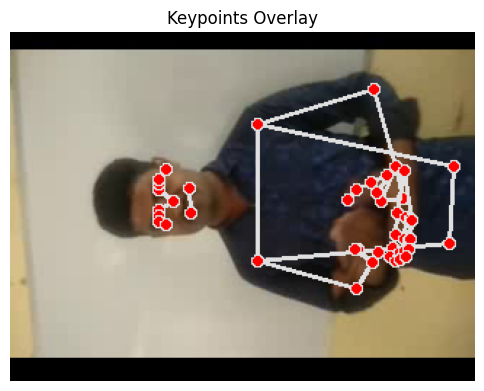

In [13]:
cap = cv2.VideoCapture(video_paths[0])
ret, frame = cap.read()
cap.release()

if ret:
    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    holistic = mp_holistic.Holistic(static_image_mode=True)
    results = holistic.process(image_rgb)

    annotated = frame.copy()
    mp_drawing.draw_landmarks(annotated, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(annotated, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(annotated, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
    plt.title('Keypoints Overlay')
    plt.axis('off')
    plt.show()

    holistic.close()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Keypoints extracted and saved for: are_you_free_today_(2)
Keypoints extracted and saved for: bring_water_for_me_(1)
Keypoints extracted and saved for: could_you_please_talk_slower_(1)


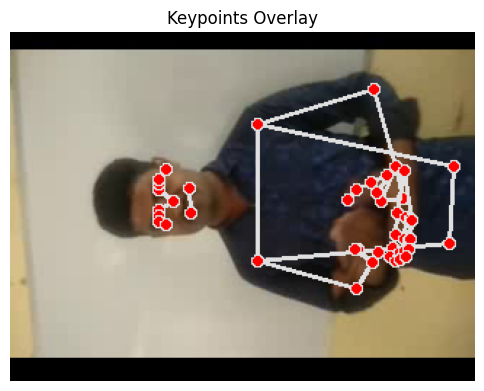

In [15]:
# Import necessary libraries
import mediapipe as mp
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define video paths
video_dir = '/content/drive/MyDrive/IETGenAI-SLT/Chapter 3/Sample Videos'
video_files = [
    'are you free today (2).mp4',
    'bring water for me (1).MP4',
    'could you please talk slower (1).mp4'
]
video_paths = [os.path.join(video_dir, f) for f in video_files]

# Initialize MediaPipe Holistic and Drawing Utils
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Define the keypoint extraction function
def extract_keypoints(video_path): # Removed max_frames parameter
    cap = cv2.VideoCapture(video_path)
    holistic = mp_holistic.Holistic(static_image_mode=True)

    keypoint_data = []

    # Process all frames in the video
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = holistic.process(image_rgb)

        row = []

        if results.pose_landmarks:
            for lm in results.pose_landmarks.landmark:
                row.extend([lm.x, lm.y, lm.z, lm.visibility])
        else:
            row.extend([0]*132)  # 33 points × 4

        if results.left_hand_landmarks:
            for lm in results.left_hand_landmarks.landmark:
                row.extend([lm.x, lm.y, lm.z])
        else:
            row.extend([0]*63)  # 21 points × 3

        if results.right_hand_landmarks:
            for lm in results.right_hand_landmarks.landmark:
                row.extend([lm.x, lm.y, lm.z])
        else:
            row.extend([0]*63)

        if results.face_landmarks:
            for lm in results.face_landmarks.landmark[:10]:  # just a subset to limit size
                row.extend([lm.x, lm.y, lm.z])
        else:
            row.extend([0]*30)

        keypoint_data.append(row)


    cap.release()
    holistic.close()
    return np.array(keypoint_data)

# Extract Keypoints and Save
for path in video_paths:
    name = os.path.basename(path).split('.')[0].replace(' ', '_').lower()
    keypoints = extract_keypoints(path)
    np.save(f'{name}_keypoints.npy', keypoints)
    print(f'Keypoints extracted and saved for: {name}')

# Visualize Keypoints Overlaid (using the first video path)
cap = cv2.VideoCapture(video_paths[0])
ret, frame = cap.read()
cap.release()

if ret:
    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    holistic = mp_holistic.Holistic(static_image_mode=True)
    results = holistic.process(image_rgb)

    annotated = frame.copy()
    mp_drawing.draw_landmarks(annotated, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(annotated, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(annotated, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
    plt.title('Keypoints Overlay')
    plt.axis('off')
    plt.show()

    holistic.close()